In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\91834\Downloads\archive (9)\walmart Retail Data.xlsx")
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [3]:
df.isnull().sum()

City                      0
Customer Age            903
Customer Name             0
Customer Segment          0
Discount                  0
Number of Records         0
Order Date                0
Order ID                  0
Order Priority            0
Order Quantity            0
Product Base Margin      63
Product Category          0
Product Container         0
Product Name              0
Product Sub-Category      0
Profit                    0
Region                    0
Row ID                    0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
Unit Price                0
Zip Code                  0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
num_imputer=SimpleImputer(strategy='median')
df[['Customer Age','Product Base Margin']]=num_imputer.fit_transform(df[['Customer Age','Product Base Margin']])


In [7]:
df['Ship Mode'].unique()

array(['Regular Air', 'Express Air', 'Delivery Truck'], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
columns_to_encode = ['Customer Segment', 'Product Category', 'Region', 'Ship Mode']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df.head()

,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_Small Business,Product Category_Office Supplies,Product Category_Technology,Region_East,Region_South,Region_West,Ship Mode_Express Air,Ship Mode_Regular Air
0,McKeesport,53.0,Jessica Myrick,0.10,1,2012-01-01,28774,High,32,0.68,...,0,0,1,1,0,1,0,0,0,1
1,Bowie,53.0,Matt Collister,0.08,1,2012-01-01,13729,Not Specified,9,0.52,...,0,1,0,1,0,1,0,0,1,0
2,Napa,53.0,Alan Schoenberger,0.00,1,2012-01-02,37537,Low,4,0.56,...,1,0,0,0,0,0,0,1,0,0
3,Montebello,53.0,Elizabeth Moffitt,0.08,1,2012-01-02,44069,Critical,43,0.39,...,0,0,0,1,0,0,0,1,0,1
4,Napa,53.0,Alan Schoenberger,0.07,1,2012-01-02,37537,Low,43,0.69,...,1,0,0,0,0,0,0,1,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   City                              8399 non-null   object        
 1   Customer Age                      8399 non-null   float64       
 2   Customer Name                     8399 non-null   object        
 3   Discount                          8399 non-null   float64       
 4   Number of Records                 8399 non-null   int64         
 5   Order Date                        8399 non-null   datetime64[ns]
 6   Order ID                          8399 non-null   int64         
 7   Order Priority                    8399 non-null   object        
 8   Order Quantity                    8399 non-null   int64         
 9   Product Base Margin               8399 non-null   float64       
 10  Product Container                 8399 non-null 

In [11]:
df['Order Priority'] = df['Order Priority'].replace('Not Specified', pd.NA)


In [12]:
df['Order Priority']=df['Order Priority'].fillna(df['Order Priority'].mode()[0])

In [13]:
df['Order Priority'].unique()

array(['High', 'Low', 'Critical', 'Medium'], dtype=object)

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
size=['Low','Medium','High','Critical']

In [16]:
enc=OrdinalEncoder(categories=[size])

In [17]:
df['Order Priority']=enc.fit_transform(df[['Order Priority']])

In [18]:
df.head()

,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_Small Business,Product Category_Office Supplies,Product Category_Technology,Region_East,Region_South,Region_West,Ship Mode_Express Air,Ship Mode_Regular Air
0,McKeesport,53.0,Jessica Myrick,0.10,1,2012-01-01,28774,2.0,32,0.68,...,0,0,1,1,0,1,0,0,0,1
1,Bowie,53.0,Matt Collister,0.08,1,2012-01-01,13729,2.0,9,0.52,...,0,1,0,1,0,1,0,0,1,0
2,Napa,53.0,Alan Schoenberger,0.00,1,2012-01-02,37537,0.0,4,0.56,...,1,0,0,0,0,0,0,1,0,0
3,Montebello,53.0,Elizabeth Moffitt,0.08,1,2012-01-02,44069,3.0,43,0.39,...,0,0,0,1,0,0,0,1,0,1
4,Napa,53.0,Alan Schoenberger,0.07,1,2012-01-02,37537,0.0,43,0.69,...,1,0,0,0,0,0,0,1,0,0


In [19]:
df['Product Container'].unique()

array(['Small Box', 'Large Box', 'Jumbo Drum', 'Wrap Bag', 'Jumbo Box',
       'Medium Box', 'Small Pack'], dtype=object)

In [20]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to the Sales column
#df['Sales'] = scaler.fit_transform(df[['Sales']])
df['Order Quantity'] = scaler.fit_transform(df[['Order Quantity']])
df['Shipping Cost'] = scaler.fit_transform(df[['Shipping Cost']])
df['Profit'] = scaler.fit_transform(df[['Profit']])
df['Unit Price'] = scaler.fit_transform(df[['Unit Price']])
df['Product Base Margin'] = scaler.fit_transform(df[['Product Base Margin']])



<IPython.core.display.Javascript object>

In [21]:
df.head()

,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_Small Business,Product Category_Office Supplies,Product Category_Technology,Region_East,Region_South,Region_West,Ship Mode_Express Air,Ship Mode_Regular Air
0,McKeesport,53.0,Jessica Myrick,0.10,1,2012-01-01,28774,2.0,0.632653,0.66,...,0,0,1,1,0,1,0,0,0,1
1,Bowie,53.0,Matt Collister,0.08,1,2012-01-01,13729,2.0,0.163265,0.34,...,0,1,0,1,0,1,0,0,1,0
2,Napa,53.0,Alan Schoenberger,0.00,1,2012-01-02,37537,0.0,0.061224,0.42,...,1,0,0,0,0,0,0,1,0,0
3,Montebello,53.0,Elizabeth Moffitt,0.08,1,2012-01-02,44069,3.0,0.857143,0.08,...,0,0,0,1,0,0,0,1,0,1
4,Napa,53.0,Alan Schoenberger,0.07,1,2012-01-02,37537,0.0,0.857143,0.68,...,1,0,0,0,0,0,0,1,0,0


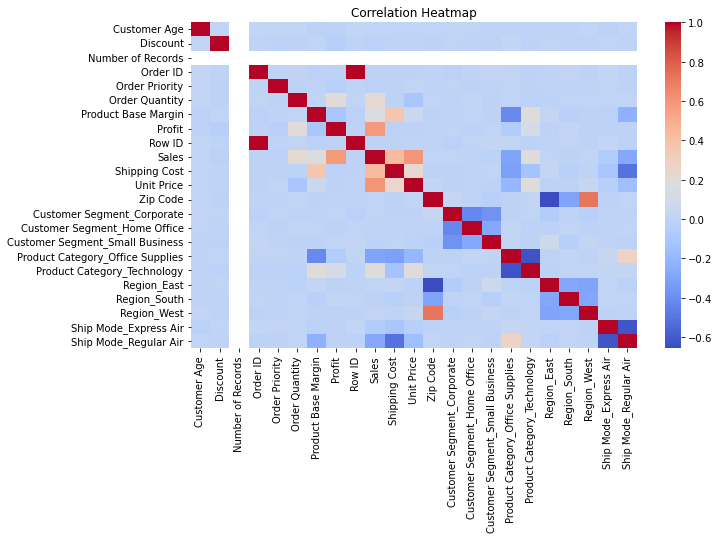

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
# Define features and target
X = df[['Order Quantity', 'Shipping Cost','Profit','Product Base Margin','Unit Price']]
       
Y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [29]:
print("Train Accuracy :", rf_regressor.score(X_train, y_train))
print("Test Accuracy :", rf_regressor.score(X_test, y_test))

Train Accuracy : 0.9932956645729578
Test Accuracy : 0.9881052395697209
